In [56]:
import numpy as np
import matplotlib.pyplot as plt
import upv_audio

# Tarea Cross-Fade

## Introducción
El objetivo de la tarea es crear una función que implemente el efecto llamado "cross-fade", que consiste en concatenar dos señales de audio de modo que exista un cierto solape entre las dos señales. En el intervalo de solape, la primera señal irá desapareciendo (*fade-out*) mientras que la segunda señal irá apareciendo (*fade-in*)

## Especificaciones
* La función a realizar recibirá como entrada:
    
    * Dos señales, *x1* y *x2* que son las que se pretende unir. La duración de las mismas será $N1$ y $N2$ respectivamente
    
    * La duración de la transición N. Se cumplirá que:
        
        * $N<N1$
        * $N<N2$

* Se supone que las señales a unir serán ambas stereo.

* La función devolverá una señal de duración $Nout = N1 + N2 - N$

Ejecute la siguiente celda para entender el resultado esperado para unas señales sencillas en función de $N$.



(9, 2)


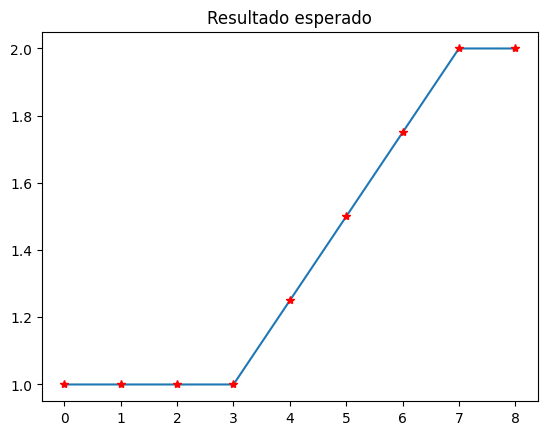

In [47]:
x1=np.ones((7,2)) # Señal de duracion 7 con muestras de valor 1
x2=2*np.ones((5,2)) # Señal stereo de duracion 5 con muestras de valor 2
N=3 # Duración de la transición
resultado_esperado=np.array([[1,1],
[1,1],
[1,1],
[1,1],                          
[1.25, 1.25],
[1.5 ,1.5 ],
[1.75, 1.75],
[2, 2],
 [2,2]])
print(resultado_esperado.shape)
_=plt.plot(resultado_esperado[:,0])
_=plt.plot(resultado_esperado[:,0],'*r')
_=plt.title("Resultado esperado")

In [49]:
def cross_fade(x1,x2,N):

    # Comprobar que ambas son stereo
    assert x1.ndim==2
    assert x2.ndim==2
    assert x1.shape[1]==2
    assert x2.shape[1]==2
    
    N1=x1.shape[0]
    N2=x2.shape[0]

    assert N1>N
    assert N2>N

    ### BEGIN SOLUTION
    rampin=np.linspace(0,1,N+2)
    rampin=rampin[1:-1]
    rampout=np.linspace(1,0,N+2)
    rampout=rampout[1:-1]

    rampin=np.expand_dims(rampin,1)
    rampout=np.expand_dims(rampout,1)

    out=np.zeros((N1+N2-N,2))
    out[:N1-N,:]=x1[:N1-N,:]
    out[-(N2-N):,:]=x2[-(N2-N):,:]
    fin1=x1[-N:,:]
    ini2=x2[:N,:]
    centro=fin1*rampout+ini2*rampin
    out[N1-N:N1,:]=centro
    
    return out
    ### END SOLUTION
    

(9, 2)


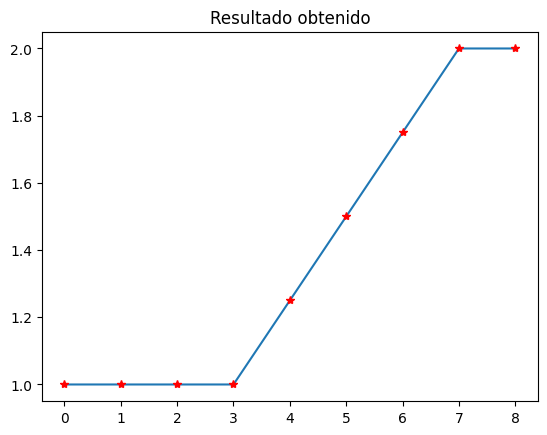

In [50]:
#Celda para verificar si el código es correcto
x1=np.ones((7,2))
x2=2*np.ones((5,2))
N=3
out=cross_fade(x1,x2,N)
print(out.shape)
assert out is not None, "Es posible que falte hacer un return"
assert type(out) == type(np.ones(3)), "El resultado debe ser un array de numpy"
assert out.ndim ==2 , "El resultado debe ser un array de numpy bidimensional"
assert out.shape[1]==2, "El resultado debe tener dos columnas"
assert out.shape[0]==(x1.shape[0]+x2.shape[0]-N), "Las dimensiones del resultado no son validas"
assert np.all(out==resultado_esperado) == True, "Las dimensiones del resultado son válidas, pero el resultado no es correcto"


_=plt.plot(out[:,0])
_=plt.plot(out[:,0],'*r')
_=plt.title('Resultado obtenido')

# Compruebe que la gráfica es como la anterior



In [54]:
# Celda para evaluar
np.random.seed(2)
x1=np.random.randn(200000,2)
x2=np.cos(2*np.pi*0.02*np.arange(100000))
x2=np.stack((x2,x2),axis=1)
N=27414
out=cross_fade(x1,x2,N)
### BEGIN HIDDEN TESTS


#ref_out=ref_cross_fade(x1,x2,N)
assert out is not None, "Es posible que falte hacer un return"
assert type(out) == type(np.ones(3)), "El resultado debe ser un array de numpy"
assert out.ndim ==2 , "El resultado debe ser un array de numpy bidimensional"
assert out.shape[1]==2, "El resultado debe tener dos columnas"
assert out.shape[0]==(x1.shape[0]+x2.shape[0]-N), "Las dimensiones del resultado no son validas"
# assert np.all(out==ref_out) == True, "Las dimensiones del resultado son válidas, pero el resultado no es correcto"
### HASHED AUTOTEST cross_fade(x1,x2,N)
### HASHED AUTOTEST cross_fade(x2,x1,N)

### END HIDDEN TESTS

## Aplicación a señales de audio

Ahora  aplicará la función desarrollada a dos señales de audio contenidas en ficheros:

* Elegirá dos archivos de audio .wav
    *  La frecuencia de muestreo de ambos debe ser la misma
 
    *  Ambos deben ser stereo
  
* Cargará dichos archivos como x1 y x2

* Elegirá los 10 primeros segundos de cada uno de ellos

* Realizará una transición gradual de duración 2 sg.

In [63]:
nombre_fichero_audio1= None
nombre_fichero_audio2= None
### BEGIN SOLUTION
nombre_fichero_audio1= "audios/elvis.wav"
nombre_fichero_audio2= "audios/elvis.wav"
### END SOLUTION

assert nombre_fichero_audio1 is not None
assert nombre_fichero_audio2 is not None

fs1,x1=upv_audio.read(nombre_fichero_audio1)
fs2,x2=upv_audio.read(nombre_fichero_audio2)

# Comprobaciones de que los ficheros de audio son validos
assert fs1==fs2, "Las frecuencias de muestreo son diferentes Elija otros archivos"
assert x1.ndim==2 and x2.ndim==2 , "Alguno de los archivos no es stereo"
assert x1.shape[1]==2 and x2.shape[1]==2 , "Alguno de los archivos no es stereo"


### Crear las señales z1 y z2 de 10 segundos de duración

Las señales z1 y z2 corresponderán a los 10 primeros segundos de las señales x1 y x2 respectivamente

In [64]:
z1=None
z2=None
### BEGIN SOLUTION
dur=int(10*fs1)
z1=x1[:dur,:]
z2=x2[:dur,:]
### END SOLUTION
assert z1 is not None and z2 is not None, "Debe completar z1 y z2"

In [66]:
# Determinar la duración de la transición
N=None
### BEGIN SOLUTION
N=2*fs1
### END SOLUTION

assert N is not None

In [68]:
# Comprobación de que las señales se han truncado correctamente y N está bien
### BEGIN HIDDEN TESTS

assert N==2*fs1, "El valor de N no es correcto"
assert type(x1)==type(z1), "z1 debe ser un array de numpy"
assert type(x2)==type(z2), "z2 debe ser un array de numpy"
assert z1.shape ==(10*fs1,2), "Las dimensiones de z1 no son correctas"
assert z2.shape ==(10*fs1,2), "Las dimensiones de z2 no son correctas"
assert np.all(z1==x1[:dur,:]), "Los valores de z1 no son correctos"
assert np.all(z2==x2[:dur,:]), "Los valores de z2 no son correctos"
### END HIDDEN TESTS

In [69]:
resultado=cross_fade(z1,z2,N)
upv_audio.write("resultado_cross_fade.wav",fs1,resultado)
print("Escuche el archivo resultado_cross_fade.wav para ver el resultado")

In [ ]:
### HASHED AUTOTEST cross_fade(z1,z2,N)